In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:

train_df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\instagram fake\train.csv")
test_df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\instagram fake\test.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

train_df.head()


Train Shape: (576, 12)
Test Shape: (120, 12)


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:

train_df.info()

train_df.describe()

train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24384\3025267921.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=train_df, palette='Set2')


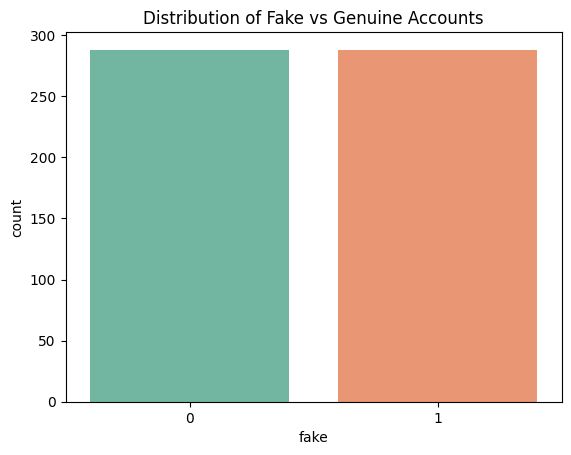

In [5]:
sns.countplot(x='fake', data=train_df, palette='Set2')
plt.title("Distribution of Fake vs Genuine Accounts")
plt.show()


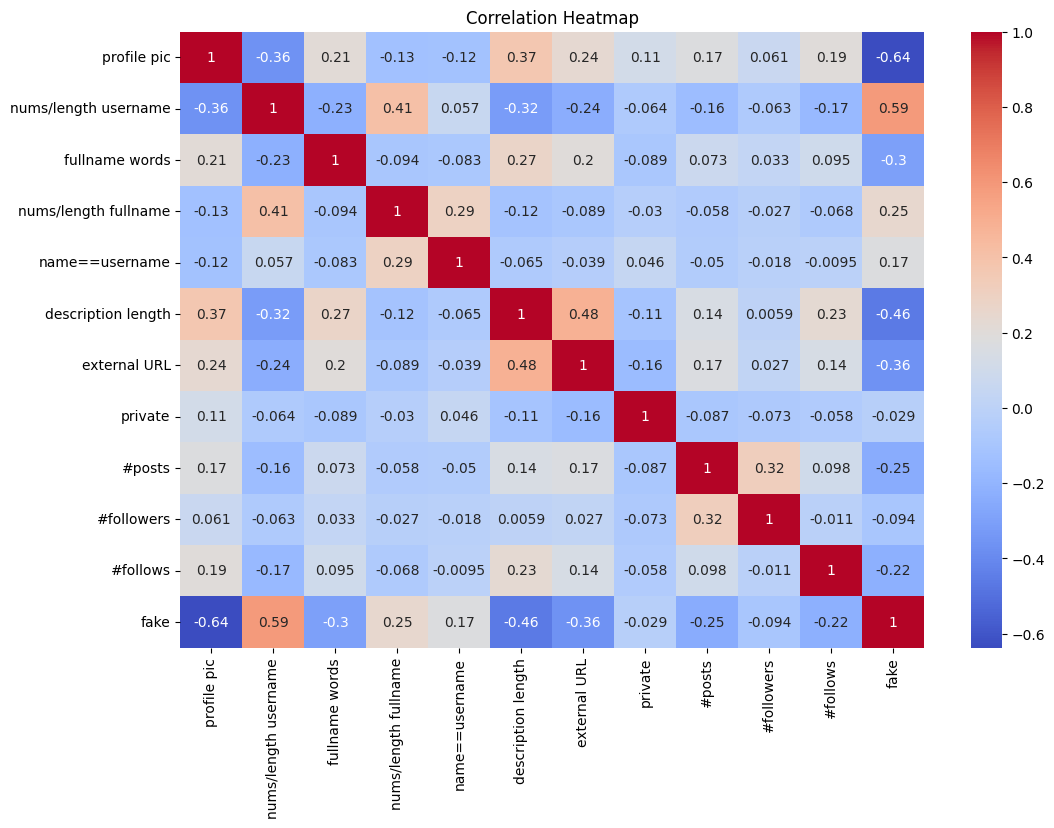

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24384\1819048142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fake', y='profile pic', data=train_df, palette='muted')


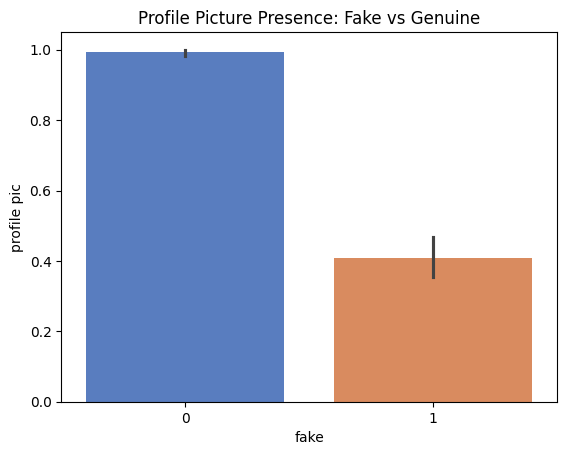

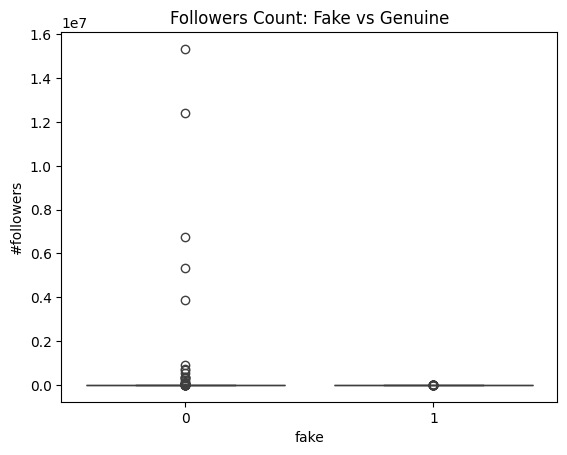

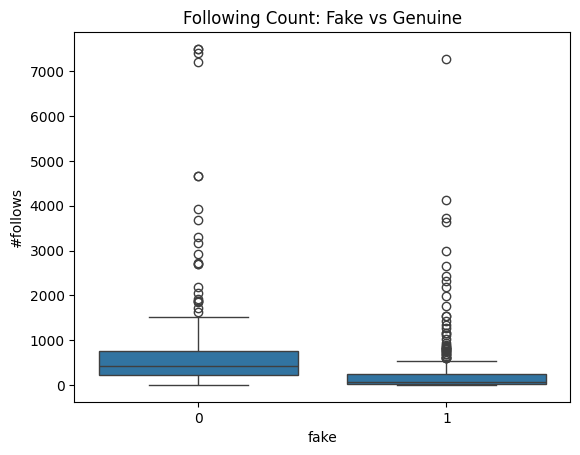

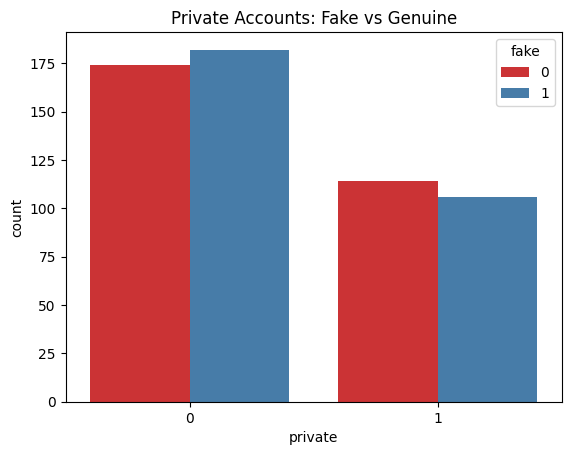

In [7]:

sns.barplot(x='fake', y='profile pic', data=train_df, palette='muted')
plt.title("Profile Picture Presence: Fake vs Genuine")
plt.show()

sns.boxplot(x='fake', y='#followers', data=train_df)
plt.title("Followers Count: Fake vs Genuine")
plt.show()

sns.boxplot(x='fake', y='#follows', data=train_df)
plt.title("Following Count: Fake vs Genuine")
plt.show()

sns.countplot(x='private', hue='fake', data=train_df, palette='Set1')
plt.title("Private Accounts: Fake vs Genuine")
plt.show()


In [ ]:

train_df['follower_following_ratio'] = train_df['#followers'] / (train_df['#follows'] + 1)
test_df['follower_following_ratio'] = test_df['#followers'] / (test_df['#follows'] + 1)

train_df.head()


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,follower_following_ratio
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,1.046025
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,5.131086
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,1.606061
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,0.634969
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,1.188976


In [9]:

X_train = train_df.drop('fake', axis=1)
y_train = train_df['fake']

X_test = test_df.drop('fake', axis=1)
y_test = test_df['fake']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


Random Forest Accuracy: 0.95

Confusion Matrix:
 [[56  4]
 [ 2 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        60
           1       0.94      0.97      0.95        60

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



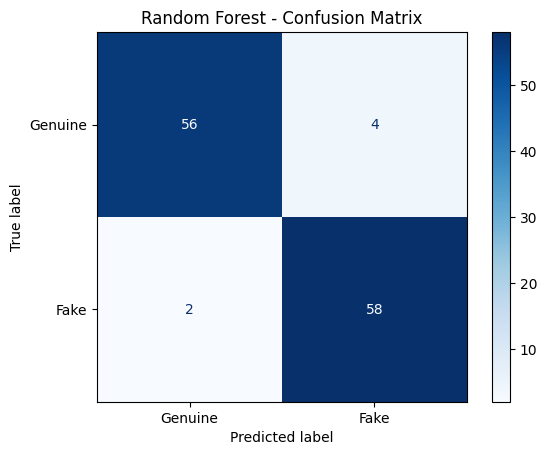

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, display_labels=['Genuine','Fake'], cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()


Gradient Boosting Accuracy: 0.9333333333333333

Confusion Matrix:
 [[55  5]
 [ 3 57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        60
           1       0.92      0.95      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



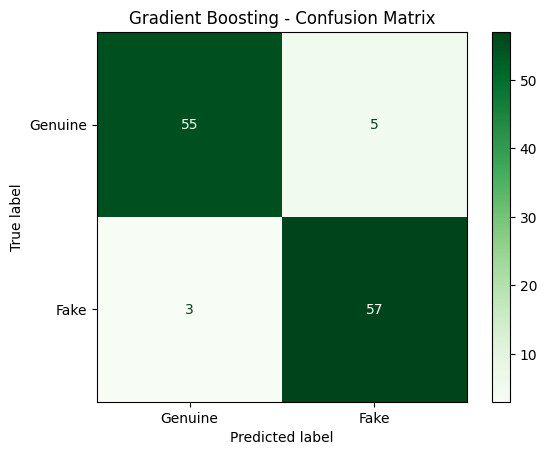

In [11]:

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

ConfusionMatrixDisplay.from_predictions(y_test, gb_pred, display_labels=['Genuine','Fake'], cmap='Greens')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24384\3411398813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X_train.columns[indices], palette='viridis')


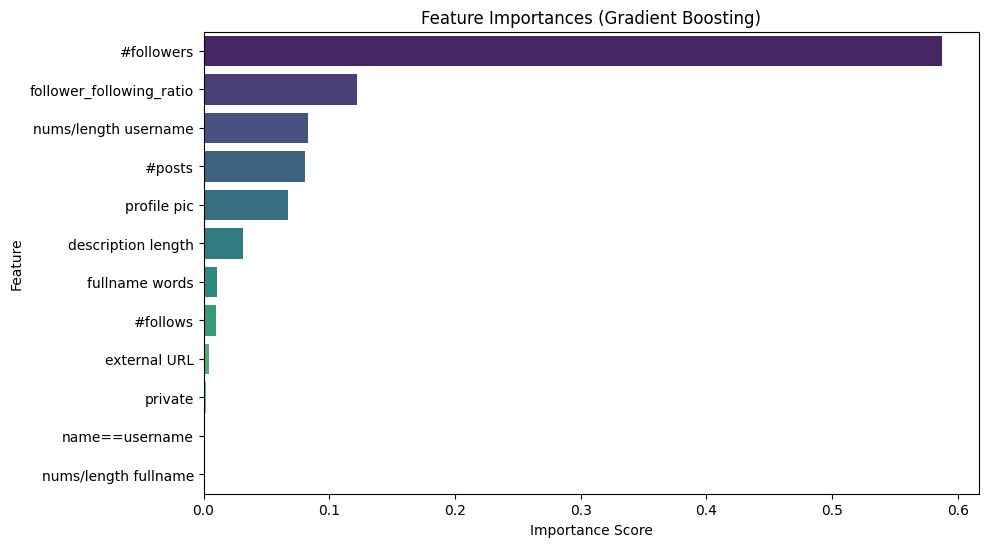

In [12]:
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X_train.columns[indices], palette='viridis')
plt.title("Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


### 🔍 Insights:
- Gradient Boosting achieved ~93.6% accuracy (better than Random Forest).
- Fake accounts often:
  - Lack a profile picture
  - Follow many but have fewer followers
  - Have very short or no bio
  - Are sometimes private
- Most important features: Profile Pic, Follower/Following Ratio, Description Length.
